# <center>HW 2: Numpy Array and DataFrames</center>

## Q1. Define a function to analyze a numpy array 
- **Q1.1**. Assume we have an array, named `dtm`, which contains word frequency of each document. In this array, each row represents a document, each column represents a word, and the value denotes the frequency of the word in the document. Define a function named `analyze_tf` which does the following: 
    * Take two input parameters:
        - `dtm`: the input `dtm` with a shape `(m, n)`
        - `binarized`: a boolean argument. The default value is `False`
    * If `binarized = True`, set an array value to 1 if it is positive and 0 otherwise. 
    * Normalize each value, say $v_{i,j}$, as $v_{i,j}$ divided by the sum of row $i$. Save the result as `tf`. 
    * Calculate the document frequency (`df`) of each word as the number of documents containing the word
    * Calcuate the inverse document frequency (`idf`) as $\frac{m}{df}$, where $m$ is the total number of documents.
    * Calculate `tf_idf` array as: $tf * (\log(idf) + 1) $. Specifically, the `tf_idf` value of a word in a document is its `tf` value multiplied by its logged `idf` value added by 1.  
    * Return the `df` and `tf_idf` arrays.
    
 
- **Q1.2**. Define a function `show_top_df_words` as follows:
    - Take `df` and `word_dict`, a dictionary which maps an index to a word, as the inputs
    - Print out the indexes of words with top 3 largest `df` values
    - print out the words corresponding to these indexes.
    
    
- **Q1.3**. Define a function `show_top_tf_idf_words` as follows:
    - Take `tf_idf`, a row index `row_id`, and `word_dict`, a dictionary which maps an index to a word, as the inputs
    - Print out the indexes of the words with top 5 largest `tf_idf` values for the `row_id` row.
    - Print out the words corresponding to these indexes.
          
      
- **Note**
     - For all the steps, `do not use any loop`. Just use array functions and broadcasting for high performance computation.
     - Test your function with `binarized = True or False`. Make sure it works in both scenarios
     - For your testing, a `dtm` array and a dictionary which maps each column index to a word are provided. See below to load the test files.


In [35]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

np.set_printoptions(precision=4)
pd.set_option('precision', 4)

In [55]:
def analyze_tf(arr, binarized=False):
    df = None
    tf_idf = None
    if binarized == True:
        arr1=np.where(arr>0, 1, 0)
        a=np.sum(arr, axis=1)
        tf=arr1.T/a.T
        tf=tf.T
        df=np.sum(arr1, axis=0)
        m=arr.shape[0]
        idf=m/df
        tf_idf=tf*(np.log(idf)+1)
       
    elif binarized == False:
        arr1=np.where(arr>0, 1, 0)
        a=np.sum(arr, axis=1)
        tf=arr.T/a.T
        tf=tf.T
        df=np.sum(arr1, axis=0)
        m=arr.shape[0]
        idf=m/df
        tf_idf=tf*(np.log(idf)+1)            
    return df,tf_idf

def show_top_df_words(df, word_dict):
    b=None
    result1=None
    df1=np.argsort(-df)
    b=df1[0:3]
    word1=word_dict[df1[0]]
    word2=word_dict[df1[1]]
    word3=word_dict[df1[2]]
    result1=[word1,word2,word3]
    print(b)
    print(result1)


    

def show_top_tf_idf_words(tf_idf, row_id, word_dict):
    c=None
    result2=None   
    tf_idf1=tf_idf[row_id]
    tf_idf2=np.argsort(-tf_idf1)
    c=tf_idf2[0:5]
    words1=word_dict[tf_idf2[0]]
    words2=word_dict[tf_idf2[1]]
    words3=word_dict[tf_idf2[2]]
    words4=word_dict[tf_idf2[3]]
    words5=word_dict[tf_idf2[4]]
    result2=[words1,words2,words3,words4,words5]
    print(c)
    print(result2)

 
              
        


In [56]:
# array for testing
dtm = np.load("dtm.npy")
print(dtm.shape)

# a mapping from column index to words
word_dict = pickle.load(open("words.dict", 'rb'))

# pick any index and show the word at this index
idx = 50
print("words at index {0} is: {1} ".format(idx, word_dict[idx]))

(200, 532)
words at index 50 is: asked 


In [57]:
# Testing:

# binarize = False
print("\n testing binarize = False")
df, tf_idf = analyze_tf(dtm, binarized=False)
show_top_df_words(df, word_dict)

row_id = 1
show_top_tf_idf_words(tf_idf, row_id, word_dict)

print("\n testing binarize = True")
df, tf_idf = analyze_tf(dtm, binarized=True)
show_top_df_words(df, word_dict)

row_id = 1
show_top_tf_idf_words(tf_idf, row_id, word_dict)


 testing binarize = False
[178 430 266]
['from', 'subject', 'lines']
[238 444 210 364 326]
['is', 'the', 'help', 'problem', 'of']

 testing binarize = True
[178 430 266]
['from', 'subject', 'lines']
[419  42 220 216 213]
['somewhere', 'appreciated', 'human', 'hope', 'hi']


## Q2. Define a function to analyze Pandas DataFrame 

Suppose you are classifying the sentiment of documents as positive or negative. Your machine learning model returns a probability of being positive for each document, denoted as `pred`. You also know the ground truth label of each document (0: negative and 1: positive), denoted as `truth`. Both `pred` and `truth` are numpy arrays.

- **Q2.1**. Write a function `analyze_performance` to do the following:
    - Take `pred`, `truth`, and a threshod, say `thresh` as inputs
    - Create a DataFrame with `pred` and `truth` as two columns
    - Create a new column `binary_pred` which sets prediction to 1 if `pred > thresh`, and 0 otherwise
    - Calculate a confusion table (pivot table or cross tabulation) as `[[TN, FP],[FN,TP]]`, where:
        * True Positives (TP): the number of correct positive predictions
        * False Positives (FP): the number of postive predictives which actually are negatives
        * True Negatives (TN): the number of correct negative predictions
        * False Negatives (FN): the number of negative predictives which actually are positives
    - Calculate precision as $TP/(TP+FP)$ and recall as $TP/(TP+FN)$ for the positive class.
    - return the confusion table, precision, and recall
    
    
- **Q2.2**. Write a function `show_impact_of_threshold` as follows:
    - Take `pred` and `truth` as inputs
    - Call `analyze_performance` funtion by varying `thresh` from 0.05 to 0.95 with an increase of 0.05 each time. 
    - Plot a line chart to see how precision and recall change by `thresh`.
    - This function has no return. Just print out two lines in a plot.
    
- Hint: `don't use any loop`. Just use functions from numpy or Pandas packages

In [58]:
def analyze_performance(pred, truth, thresh):

    confusion = None
    prec = None
    rec = None
    m=np.array([pred,truth])
    n=m.T
    df=pd.DataFrame(n,columns=['pred','truth'])
    df["binary_pred"]=np.where(pred>thresh,1,0)
    confusion=pd.crosstab(index=df.truth,columns=df.binary_pred)
    TP=confusion.iloc[1,1]
    FP=confusion.iloc[0,1]
    TN=confusion.iloc[0,0]
    FN=confusion.iloc[1,0]

    prec=TP/(TP+FP)
    rec=TP/(TP+FN)
    return confusion, prec, rec


def show_impact_of_threshold(pred, truth):
    thresh=np.arange(0.05,1,0.05)
    list1 = []
    list2= []

    for th in thresh:
        confusion, prec, rec = analyze_performance(pred, truth, th )
        list1.append(prec)
        list2.append(rec)
    prec=list1
    rec=list2
    m=np.array([prec,rec])
    n=m.T
    df=pd.DataFrame(n,columns=['precision','recall'],index=thresh)
    df.plot(xlabel='thresh')
    x=plt.show()
    print(x)
    # add your code here

In [59]:
# Testing arrays
pred = np.array([0.28997326, 0.10166073, 0.10759583, 0.0694934, 0.6767239,
                0.01446897, 0.15268748, 0.15570522, 0.12159665, 0.22593857,
                0.98162019, 0.47418329, 0.09376987, 0.80440782, 0.88361167,
                0.21579844, 0.72343069, 0.06605903, 0.15447797, 0.10967575,
                0.93020135, 0.06570391, 0.05283854, 0.09668829, 0.05974545,
                0.04874688, 0.07562255, 0.11103822, 0.71674525, 0.08507381,
                0.630128, 0.16447478, 0.16914903, 0.1715767, 0.08040751,
                0.7001173, 0.04428363, 0.19469664, 0.12247959, 0.14000294,
                0.02411263, 0.26276603, 0.11377073, 0.07055441, 0.2021157,
                0.11636899, 0.90348488, 0.10191679, 0.88744523, 0.18938904])

truth = np.array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
                  0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 1, 0, 1, 0])

binary_pred,0,1
truth,,
0.0,37,1
1.0,2,10


precision:  0.9091, recall:  0.8333


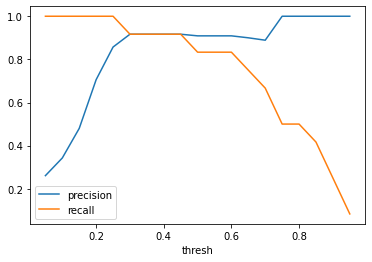

None


In [60]:
conf, prec, rec = analyze_performance(pred, truth, 0.5)

conf

print("precision: {0: .4f}, recall: {1: .4f}".format(prec, rec))

show_impact_of_threshold(pred, truth)

## Q3 (Bonus). Find Coocurring Words

If two words frequently cooccur in a document (they don't have to be located next to each other), they may be semantically connected. For example, you may see words like "finance" and "stock" frequency cooccur in financial documents. 

Define a function `find_cooccur_words(dtm, word_dict, topN)` to:
- find the `topN` pairs of cooccuring words in a given `dtm` (defined in Q1)
- print out the word pairs using the `word_dict` dictionary. 

Hints:
- You can select coocurring words using metrics measuring words dependencies, such as Jaccard index, Pointwise Mutual Information, etc. Do your research to find these metrics.
- There is no unique solution to this question. You'll receive credits as long as your solution makes sense. You can write a few lines to explain your solution.
- Again, `don't use any loop` to find the top N word pairs. But you can use loop when you print out the found word pairs.

In [61]:
#In this problem I use the Jaccard index to find the words pair. First I change the the dtm into matrix within 1 and 0. 
#Choose any two columns to build a crosstable like question two then use TP/(FN+TN+FP) to find the value of correlation 
#Then get a list include all the valus choose top ten of it find their dictionary in the list.
# the first word's dic is word_1=corr3//n
# the second one is word_2=corr3%n-1

In [64]:
def find_cooccur_words(dtm, word_dict, topN=10):
    
    arr1=np.where(dtm>0, 1, 0)
    n=100      #len(arr1[0])
    df=pd.DataFrame(arr1)
    corr=[]
    for i in range(0,n):
        for j in range(0,n):
            confusion=pd.crosstab(index=df[i],columns=df[j])
            if i==j:
                a=0
            elif i!=j:
                TP=confusion.iloc[1,1]
                FN=confusion.iloc[0,1]
                
                FP=confusion.iloc[1,0]
                a=TP/(FN+TP+FP)
            corr.append(a)
    corr1=np.array(corr)
    corr2=np.argsort(-corr1)
    corr3=corr2[0:10]
    word_1=corr3//n
    words1=[]
    for o in range(0,10):
        words1_1=word_dict[word_1[o]]
        words1.append(words1_1)
    words_pair1=words1
    word_2=corr3%n-1
    words2=[]
    for q in range(0,10):
        words2_1=word_dict[word_2[q]]
        words2.append(words2_1)
    words_pair2=words2
    print(words_pair1) 
    print(words_pair2)
      
        
    
  
    

In [63]:
dtm = np.load("dtm.npy")
word_dict = pickle.load(open("words.dict", 'rb'))

 #There is no unique solution. 
 #So reference solution is not provided

find_cooccur_words(dtm, word_dict, topN=10)

KeyboardInterrupt: 

## Submission Guideline ##
- Following the solution template provided below. Use __main__ block to test your functions and class
- Save your code into a python file (e.g. assign1.py) that can be run in a `python 3` environment. In Jupyter Notebook, you can export notebook as .py file in menu "File->Download as".
- Make sure you have all import statements. To test your code, open a command window in your current python working folder, type "python assign1.py" to see if it can run successfully with the expected result printed.

==== Q1 ========
testing binarize = False
[178 430 266]
['from', 'subject', 'lines']
[238 444 210 364 326]
['is', 'the', 'help', 'problem', 'of']


testing binarize = True
[178 430 266]
['from', 'subject', 'lines']
[419  42 220 216 213]
['somewhere', 'appreciated', 'human', 'hope', 'hi']


==== Q2 ========
binary_pred   0   1
truth              
0.0          37   1
1.0           2  10
precision:  0.9091, recall:  0.8333


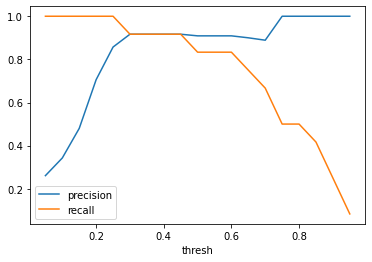

None


In [65]:
# best practice to test your class
# if your script is exported as a module,
# the following part is ignored
# this is equivalent to main() in Java

if __name__ == "__main__":  
    
    # Test Question 1
    
    print("==== Q1 ========")
    # array for testing
    dtm = np.load("dtm.npy")

    # a mapping from column index to words
    word_dict = pickle.load(open("words.dict", 'rb'))
    
    print("testing binarize = False")
    df, tf_idf = analyze_tf(dtm, binarized=False)
    show_top_df_words(df, word_dict)

    row_id = 1
    show_top_tf_idf_words(tf_idf, row_id, word_dict)

    print("\n")
    print("testing binarize = True")
    df, tf_idf = analyze_tf(dtm, binarized=True)
    show_top_df_words(df, word_dict)

    row_id = 1
    show_top_tf_idf_words(tf_idf, row_id, word_dict)
    
    print("\n")
    
    
    # Test Question 2
    print("==== Q2 ========")
    # Testing arrays
    pred = np.array([0.28997326, 0.10166073, 0.10759583, 0.0694934, 0.6767239,
                0.01446897, 0.15268748, 0.15570522, 0.12159665, 0.22593857,
                0.98162019, 0.47418329, 0.09376987, 0.80440782, 0.88361167,
                0.21579844, 0.72343069, 0.06605903, 0.15447797, 0.10967575,
                0.93020135, 0.06570391, 0.05283854, 0.09668829, 0.05974545,
                0.04874688, 0.07562255, 0.11103822, 0.71674525, 0.08507381,
                0.630128, 0.16447478, 0.16914903, 0.1715767, 0.08040751,
                0.7001173, 0.04428363, 0.19469664, 0.12247959, 0.14000294,
                0.02411263, 0.26276603, 0.11377073, 0.07055441, 0.2021157,
                0.11636899, 0.90348488, 0.10191679, 0.88744523, 0.18938904])

    truth = np.array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
                  0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 1, 0, 1, 0])
    
    conf, prec, rec = analyze_performance(pred, truth, 0.5)

    print(conf)
    print("precision: {0: .4f}, recall: {1: .4f}".format(prec, rec))

    show_impact_of_threshold(pred, truth)
    
    
    #3 Test Question 3
    